In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig as bw
import h5py

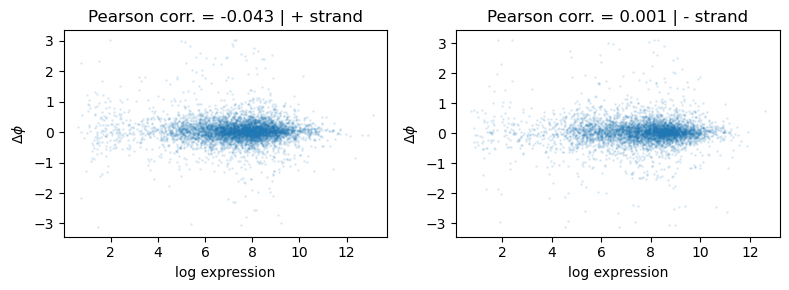

In [27]:

bin_size = 10000
bin_phase_amp = {}
bin_phase_amp['+'] = pd.read_csv(f'../results/GRCm38/phase_amp/bin_phase_amp_forward_{bin_size}bp.csv',sep='\t')
bin_phase_amp['-'] = pd.read_csv(f'../results/GRCm38/phase_amp/bin_phase_amp_reverse_{bin_size}bp.csv',sep='\t')

fig, axes = plt.subplots(1,2,figsize=(8,3))

for strand in ['+','-']:

    r2 = .5*(bin_phase_amp[strand]['pval'].values[1:]+bin_phase_amp[strand]['R2'].values[:-1])
    pval = .5*(bin_phase_amp[strand]['pval'].values[1:]+bin_phase_amp[strand]['pval'].values[:-1])

    if strand == '+':
        d_phase = bin_phase_amp[strand]['phase'].values[1:] - bin_phase_amp[strand]['phase'].values[:-1]
        # keep phase between -pi and pi
        d_phase = (d_phase + np.pi) % (2*np.pi) - np.pi
        expression = bin_phase_amp[strand]['mean_log_expression'].values[1:]

    if strand == '-':
        d_phase = bin_phase_amp[strand]['phase'].values[:-1] - bin_phase_amp[strand]['phase'].values[1:]
        # keep phase between -pi and pi
        d_phase = (d_phase + np.pi) % (2*np.pi) - np.pi
        d_phase = d_phase[::-1]
        expression = bin_phase_amp[strand]['mean_log_expression'].values[:-1][::-1]
        r2 = r2[::-1]
        pval = pval[::-1]
    
    # make sure Delta phase is between -pi and pi
    d_phase = (d_phase + np.pi) % (2*np.pi) - np.pi

    idx_r2 = r2>0.8
    idx = pval<0.01

    ax = axes[0] if strand == '+' else axes[1]

    ax.scatter(expression[idx],d_phase[idx],s=1,alpha=0.1)
    ax.set_title(f'Pearson corr. = {np.corrcoef(expression[idx],d_phase[idx])[0,1]:.3f} | {strand} strand')
    ax.set_xlabel(r'log expression')
    ax.set_ylabel(r'$\Delta \phi$')

fig.tight_layout()
plt.savefig(f'fig/D_phase_vs_expression_{bin_size}bp.pdf')

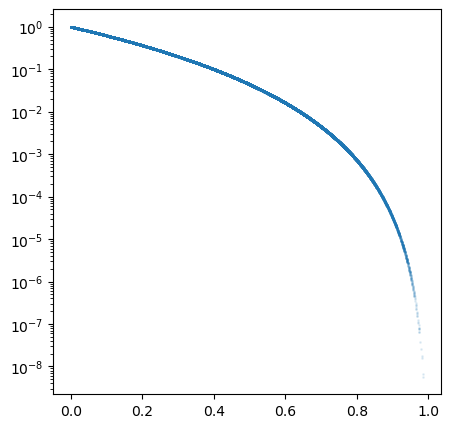

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(bin_phase_amp['+']['R2'],bin_phase_amp['+']['pval'],s=1,alpha=0.1)
ax.set_yscale('log')